In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import fundamentalanalysis as fa
from datetime import datetime
import plotly.express as px
from datetime import date, timedelta
import numpy as np
FA_API_KEY = '85fe259a4ec6fad3cbe55a5ddaf7f9b4'

In [2]:
companies = ["VOO", "AAPL", "MSFT"]
company_shares = [5, 6, 7]
def data(stock_ticker, shares):
    prices = fa.stock_data(stock_ticker, period = "5y", interval = "1d")
    x = prices["close"]*shares
    return x
z = data("AAPL", 3)
df = pd.DataFrame(z)
df = z.reset_index().rename(columns={'index': 'dates', 'close': 'price'})
df

,dates,price
0,2018-03-08,131.272499
1,2018-03-09,132.705002
2,2018-03-10,134.984997
3,2018-03-13,136.290001
4,2018-03-14,134.977501
...,...,...
1253,2023-03-01,442.230011
1254,2023-03-02,435.929993
1255,2023-03-03,437.730011
1256,2023-03-04,453.089996


In [ ]:
# create some sample data
companies = ['GOOG', 'AMZN']
company_shares = [50, 75]

# iterate over the companies and append the data to the DataFrame
for i in range(len(companies)):
    z = data(companies[i], company_shares[i])
    test_df = pd.DataFrame(z)
    df = df.merge(test_df, left_on= df.index, right_on=test_df.index)

In [ ]:
msft = data("MSFT", 4)
msft_df = pd.DataFrame(msft)

In [ ]:
df.merge(msft_df, left_on= df.index, right_on=msft_df.index)

In [ ]:
for i in range(len(companies)):
    stock_data = data(companies[i])
    stock_data["total_value"] = stock_data["close_price"] * company_shares[i]
    company_data.append(stock_data)
company_data

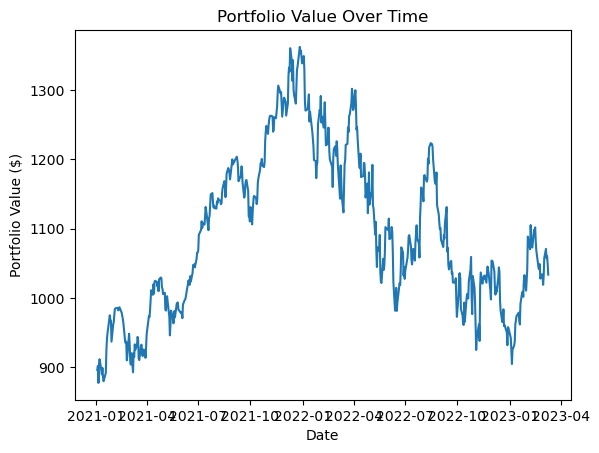

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "GOOG"]
shares = [3, 2, 1]
date = '2021-01-01'

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start=date)
    stock_data['portfolio_value'] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data['portfolio_value']], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)

plt.plot(data.index, data['total_portfolio_value'])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.show()

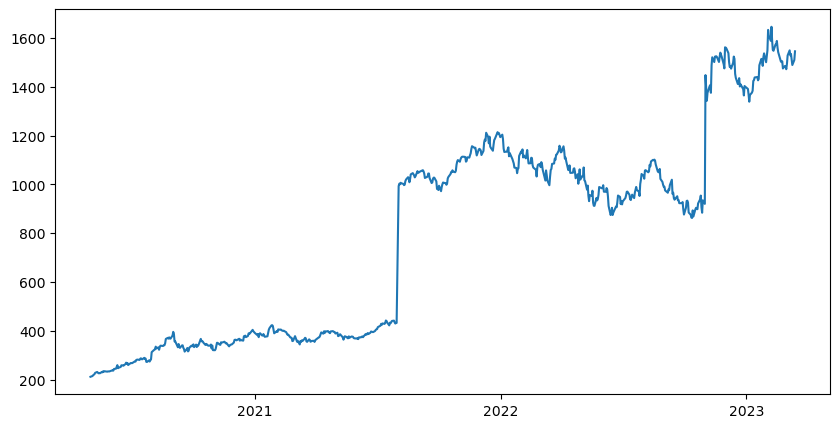

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

tickers = ["AAPL", "MSFT", "GOOG"]
shares = [3, 2, 6]
date_purchased = ['2020-05-01', '2021-08-01', '2022-11-01']
date_purchased = pd.to_datetime(date_purchased)

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start=date_purchased[i])
    stock_data['portfolio_value'] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data['portfolio_value']], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# remove the x-axis label
# plt.xlabel('')

# set the x-axis tick locator and formatter to show only the years
years = YearLocator()
year_format = DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)

plt.show()


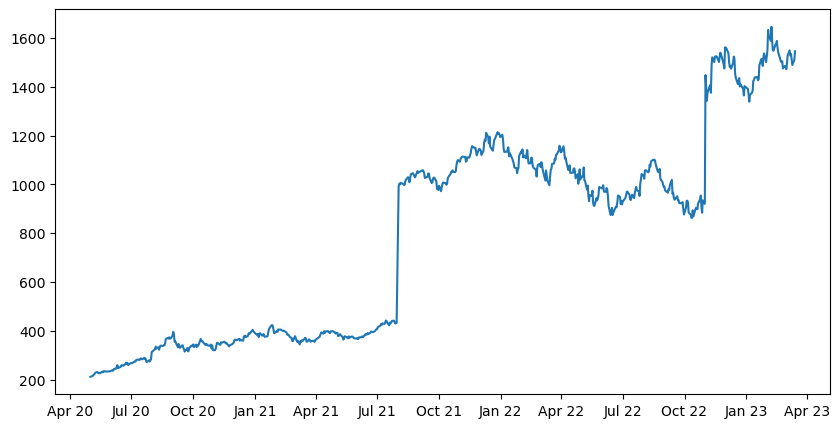

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

tickers = ["AAPL", "MSFT", "GOOG"]
shares = [3, 2, 6]
date_purchased = ['2020-05-01', '2021-08-01', '2022-11-01']
date_purchased = pd.to_datetime(date_purchased)

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start=date_purchased[i])
    stock_data['portfolio_value'] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data['portfolio_value']], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# set the x-axis tick locator and formatter to show only January, April, July, and October of each year
months = MonthLocator(bymonth=[1, 4, 7, 10])
month_format = DateFormatter('%b %Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)

# modify the month format to show abbreviated month names using three letters
month_format = DateFormatter('%b %y')
ax.xaxis.set_major_formatter(month_format)

plt.show()

In [3]:
import matplotlib
print(matplotlib.__version__)

3.6.2
